## LUFTHANSA CASE

Airline legacy type Lufthansa (plutôt que AF), prendre émissions à 22.9 mTons CO2 en 2022, avec 43% soumis à l'EU-ETS. Flotte moyen courrier constante (ajd 126 famille A320 et 39 famille A320neo, 15% de réduction de conso entre les deux, 17 A320 remplacés par an par des neos jusqu'en 2030)

In [1]:
import numpy as np
from utils.data import *
from utils.hypothesis import *
from utils.utils import *
from utils.fleet_carbu import *

In [2]:
emission_0 = 22.9
A320_0 = 126
A320neo_0 =39
replacement_nbr = 17
em_reduction_rate = 0.15
deb =2023
fin = 2030
nbr_annee = fin-deb


volume_carbu_luft, CO2_emission_luft = fleet_carbu(deb, fin, emission_0, A320_0, A320neo_0, replacement_nbr, em_reduction_rate)
emission_A320 = 22.9/(A320_0 + 0.85*A320neo_0)

In [3]:
emission_euets_luft = np.array([round(0.43 * i,2) for i in CO2_emission_luft])
emission_euets_luft

array([9.85, 9.69, 9.53, 9.37, 9.22, 9.06, 8.9 , 8.74])

La liste des émissions de Lufthansa représentent des émissions dans le cadre du programe EU-ETS (liste : "emission_euets") et des émissions hors cadres EU-ETS

On considère que l'incorporation des SAF se concentre sur les émission EUETS seulement

In [4]:
allowance_free = emission_0

In [5]:
prix_kero_saf_an, prix_carbone_kero_saf, prix_saf_an, allowances_extra_an, prix_ap_allowances_an, prix_kero_an, prix_carbone_kero_an= calculs_with_saf(nbr_annee,
                                        volume_carbu_luft,
                                        incorpo_saf_eu,
                                        allowance_free,
                                        quota_eu,
                                        carbonprice,
                                        price_saf,
                                        price_kero,
                                        allowance_SAF
)
print(prix_kero_saf_an)

IndexError: index 7 is out of bounds for axis 0 with size 7

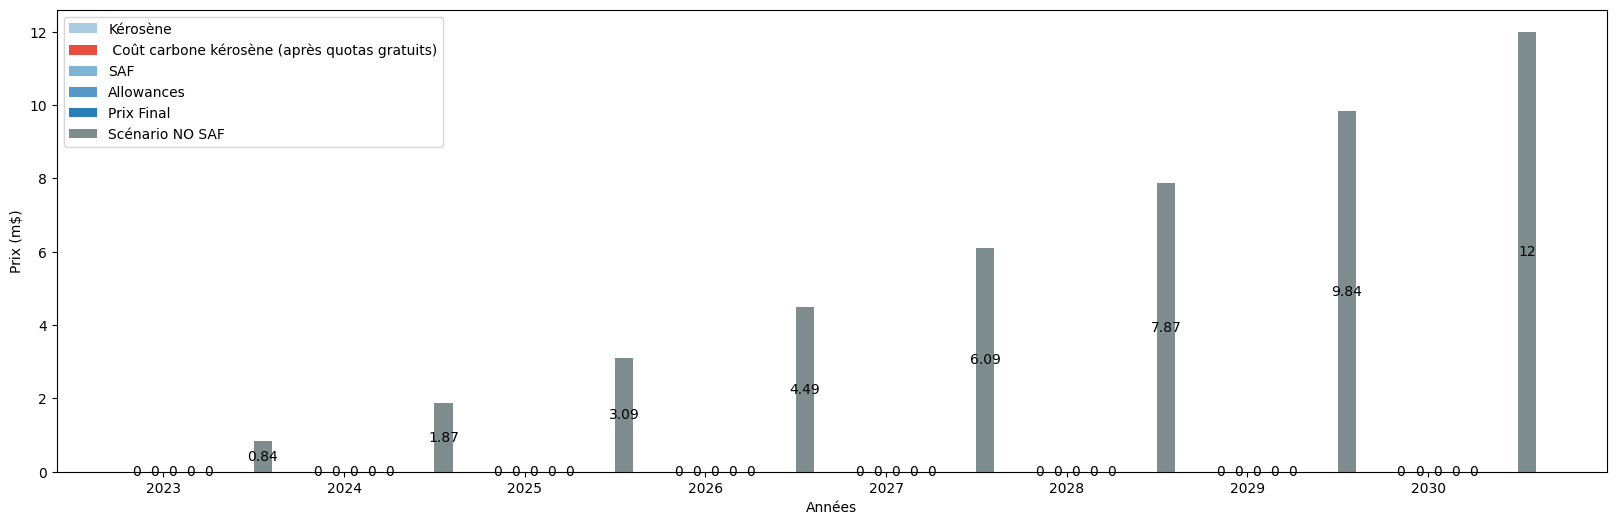

In [47]:

"""2. Graphique"""

labels =['Kérosène',
         'Coût carbone kérosène (après quotas gratuits)',
          'SAF',
          'Allowances',
          'Prix Final',
          'Scénario NO SAF']

data = np.array([np.round(prix_kero_saf_an/1000000,2),
                 np.round(prix_carbone_kero_saf/1000000,2),
                  np.round(prix_saf_an/1000000,2),
                  np.round(allowances_extra_an/1000000,2),
                  np.round((prix_ap_allowances_an+prix_carbone_kero_saf)/1000000,2),
                  np.round((prix_carbone_kero_an + prix_kero_an)/1000000,2)])

graphique(data, labels)